## Frequency

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# read csv data
data_path = "C:\\Users\\98354\\Documents\\脚本\\news\\finall_data.csv"
df = pd.read_csv('C:\\Users\\98354\\Documents\\脚本\\news\\finall_data.csv')

# keep useful columns
df_subset = df[['keyword', 'headline', 'date']]

df_subset['date'] = pd.to_datetime(df['date'])

df_subset.head()

C:\Users\98354\AppData\Local\Temp\ipykernel_21752\2655454041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['date'] = pd.to_datetime(df['date'])


,keyword,headline,date
0,Climate change,"Gary Braasch, photographer and climate change ...",2016-03-07
1,Paris Agreement,Lucas says 'phenomenal' Neymar would be great ...,2016-03-07
2,Environmental policy,Plaintiffs in Tennessee suit want to keep Mann...,2016-03-08
3,Sea level rise,Awesome glaciers you must visit before they melt,2016-03-09
4,Climate change,Trudeau to talk up climate change,2016-03-09


### Create a funtion to draw the line chart of the total amount of news articles, the x-axis is time, the time format is (month-date-year)

In [11]:
def draw_line_one(start_date, end_date, f_date,df_subset,title ):
    mask = (df_subset['date'] >= start_date) & (df_subset['date'] <= end_date)
    filtered_df = df_subset.loc[mask]
    
    # Group and count by month
    monthly_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()

    # Create a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o')

    # Specify the display format of the abscissa date
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Draw a red dotted line at XX/202X
    vline_date = pd.Timestamp(f_date)
    plt.axvline(vline_date , color='red', linestyle='--')

    # Set title and axis labels
    plt.title(title ,fontsize=16)
    plt.xlabel('Month' ,fontsize=16)
    plt.ylabel('Number of Articles',fontsize=16)

    # Make abscissa date labels more readable
    plt.gcf().autofmt_xdate()

    # Show chart
    plt.show()

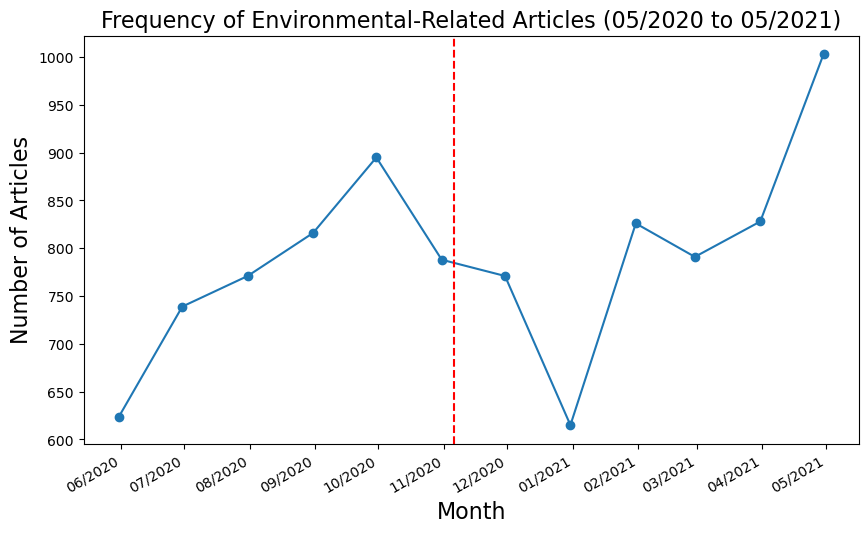

In [12]:
# the line chart of the total amount of news articles
# 2020/05 to 2021/05
start_date = "2020-05-01"
end_date = "2021-04-30"
f_date = "2020-11-06"
draw_line_one(start_date, end_date, f_date,df_subset,"Frequency of Environmental-Related Articles (05/2020 to 05/2021)" )

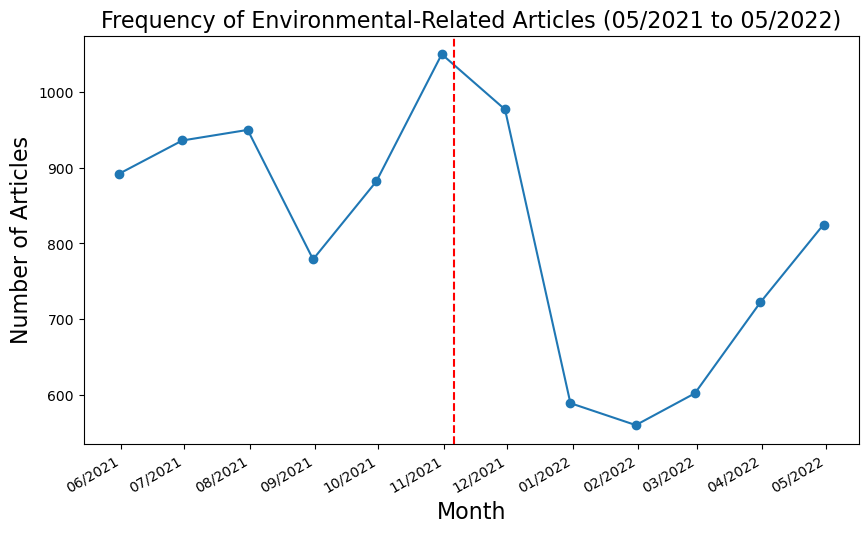

In [13]:
# the line chart of the total amount of news articles
# 2021/05 to 2022/05 
start_date = "2021-05-01"
end_date = "2022-04-30"
f_date = "2021-11-06"
draw_line_one(start_date, end_date, f_date,df_subset , "Frequency of Environmental-Related Articles (05/2021 to 05/2022)")

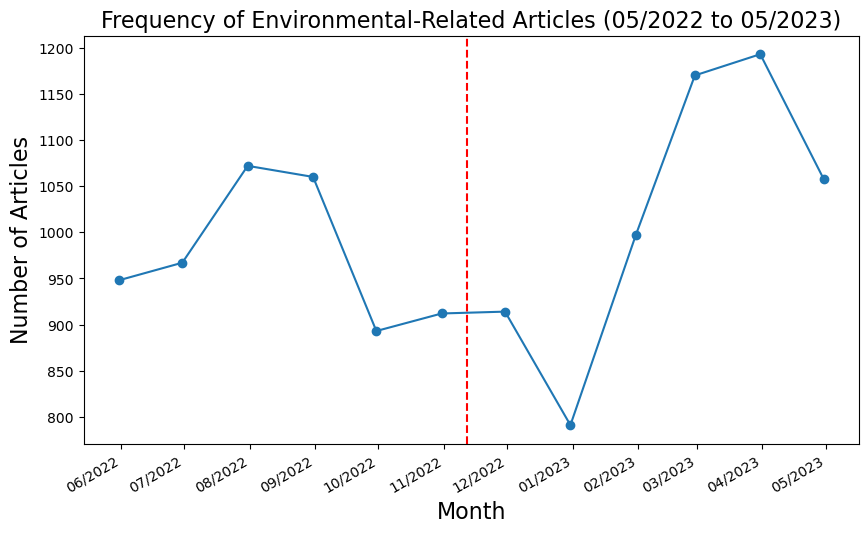

In [14]:
# the line chart of the total amount of news articles
# 2022/05 to 2023/05 
start_date = "2022-05-01"
end_date = "2023-04-30"
f_date = "2022-11-12"
draw_line_one(start_date, end_date, f_date,df_subset , "Frequency of Environmental-Related Articles (05/2022 to 05/2023)")

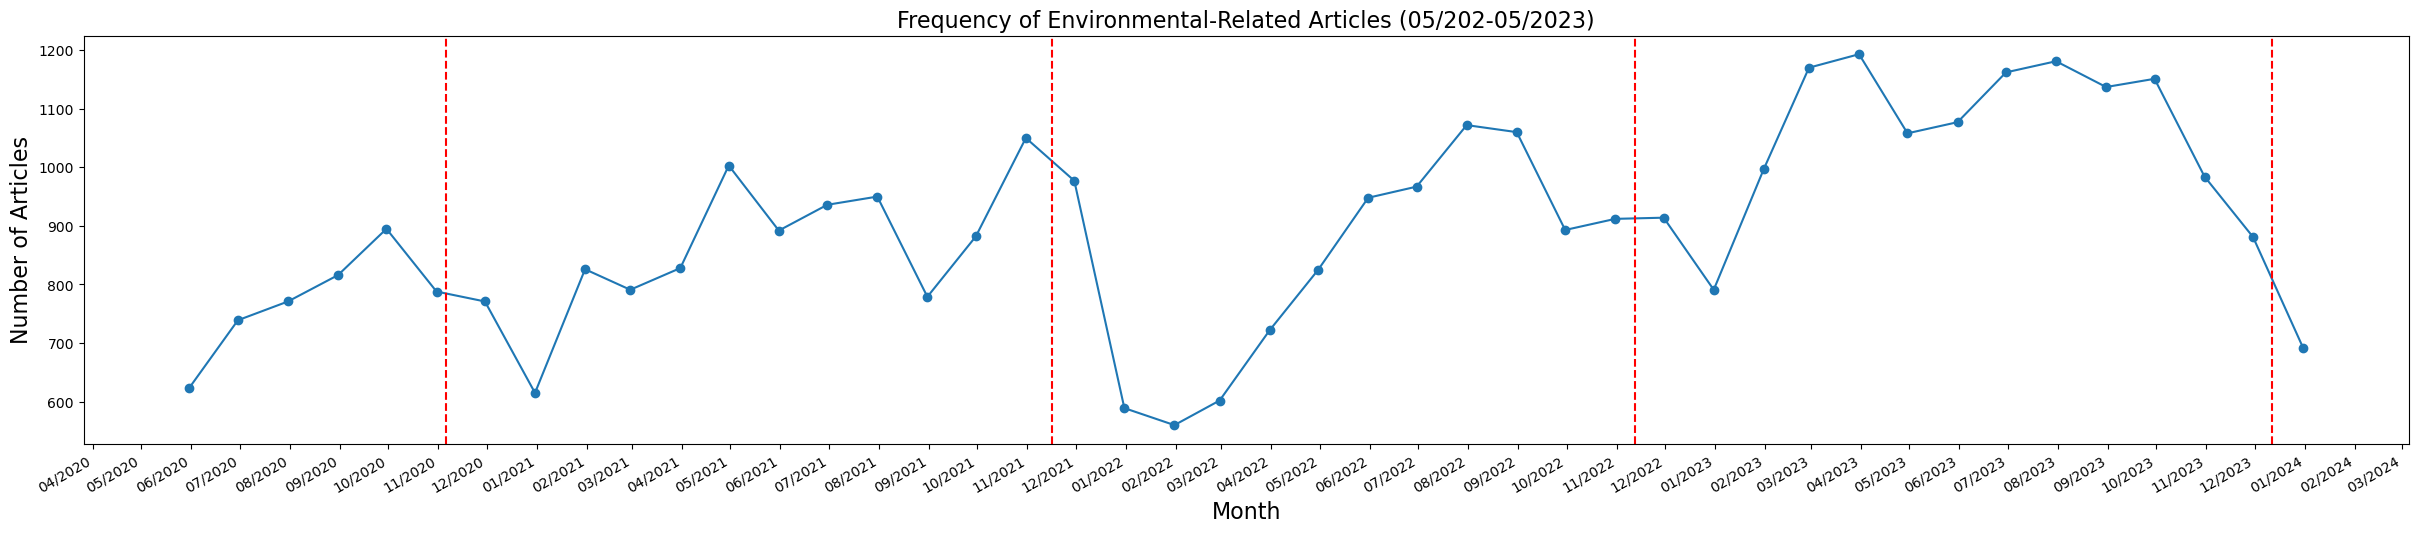

In [15]:
# the line chart of the total amount of news articles
# 2020/05 to 2023/05
start_date = "2020-05-01"
end_date = "2023-12-30"

f_date_1 = "2020-11-06"
f_date_2 = "2021-11-16"
f_date_3 = "2022-11-12"
f_date_4 = "2023-12-12"

mask = (df_subset['date'] >= start_date) & (df_subset['date'] <= end_date)
filtered_df = df_subset.loc[mask]
    
# Group and count by month
monthly_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()

# Create a line chart
plt.figure(figsize=(30, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')

# Specify the display format of the abscissa date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

vline_date_1 = pd.Timestamp(f_date_1)
plt.axvline(vline_date_1 , color='red', linestyle='--')

vline_date_2 = pd.Timestamp(f_date_2)
plt.axvline(vline_date_2 , color='red', linestyle='--')

vline_date_3 = pd.Timestamp(f_date_3)
plt.axvline(vline_date_3 , color='red', linestyle='--')

vline_date_4 = pd.Timestamp(f_date_4)
plt.axvline(vline_date_4, color='red', linestyle='--')

# Set title and axis labels
plt.title("Frequency of Environmental-Related Articles (05/202-05/2023)",fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of Articles',fontsize=16)

# Make abscissa date labels more readable
plt.gcf().autofmt_xdate()

# Show chart
plt.show()

### Draw line charts based on keywords, with the x-axis being time.

In [16]:
def draw_line_two(start_date, end_date,df_subset,f_date,title ):
    mask = (df_subset['date'] >= start_date) & (df_subset['date'] <= end_date)
    filtered_df = df_subset.loc[mask]
    
     # Now count the top ten most frequent keywords
    top_keywords = filtered_df['keyword'].value_counts().head(10).index.tolist()
    
    # Initialize graphics
    plt.figure(figsize=(14, 8))

    # For each keyword, summarize the number of articles per month and draw a line
    for keyword in top_keywords:
        keyword_data = filtered_df[filtered_df['keyword'] == keyword]
        keyword_monthly_counts = keyword_data.groupby(pd.Grouper(key='date', freq='M')).size()
        plt.plot(keyword_monthly_counts.index, keyword_monthly_counts, marker='o', label=keyword)

    # Specify the display format of the abscissa date
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    vline_date_1 = pd.Timestamp(f_date)
    plt.axvline(vline_date_1 , color='red', linestyle='--')

    # Set title and axis labels
    plt.title(title,fontsize=16)
    plt.xlabel('Month',fontsize=16)
    plt.ylabel('Number of Articles',fontsize=16)

    # Rotate abscissa date label
    plt.gcf().autofmt_xdate()

    # Add a legend and adjust the position automatically
    plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show chart
    plt.tight_layout()
    plt.show()

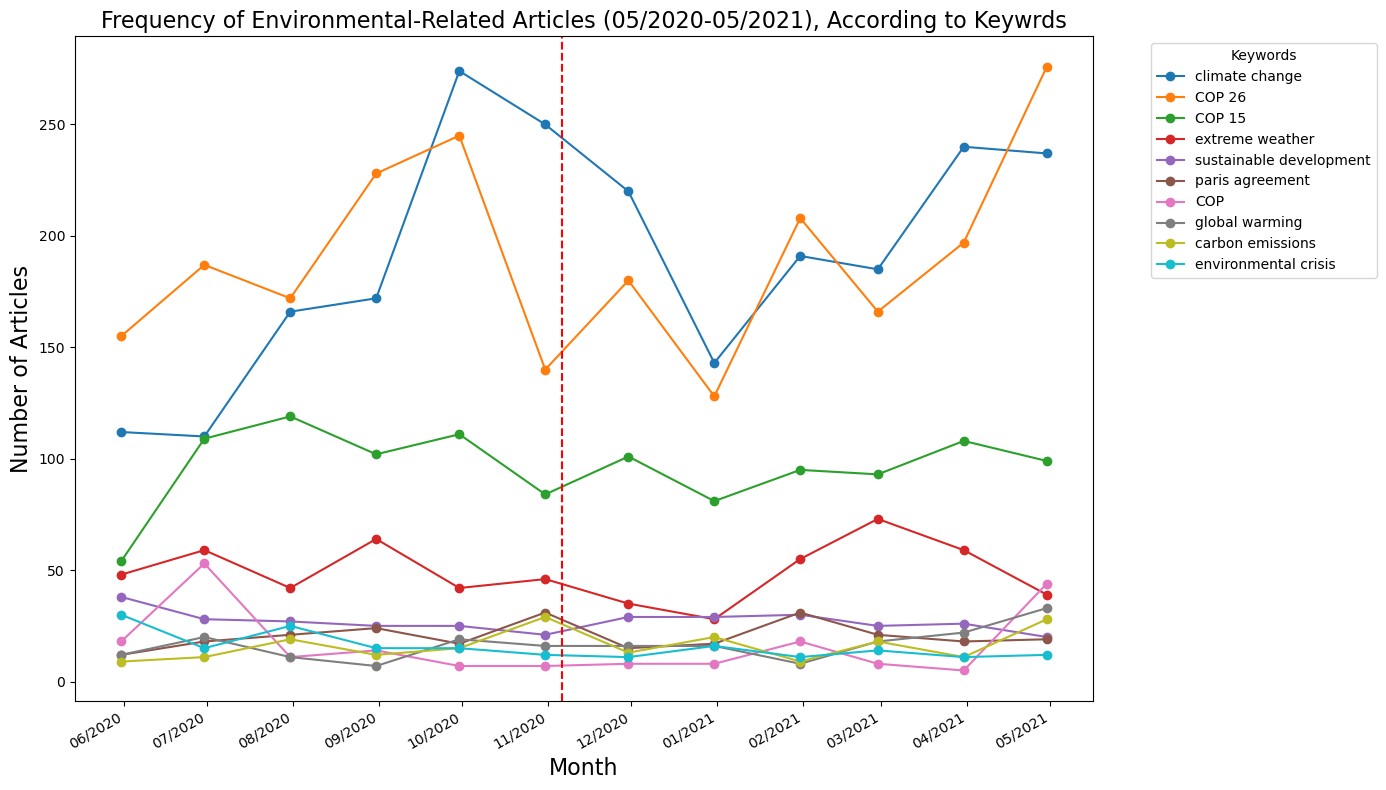

In [18]:
# draw line chart of the top 10 keywords, 2020/05 to 2021/05 
start_date = "2020-05-01"
end_date = "2021-04-30"
f_date = "2020-11-06"
draw_line_two(start_date, end_date,df_subset,f_date,"Frequency of Environmental-Related Articles (05/2020-05/2021), According to Keywrds" )

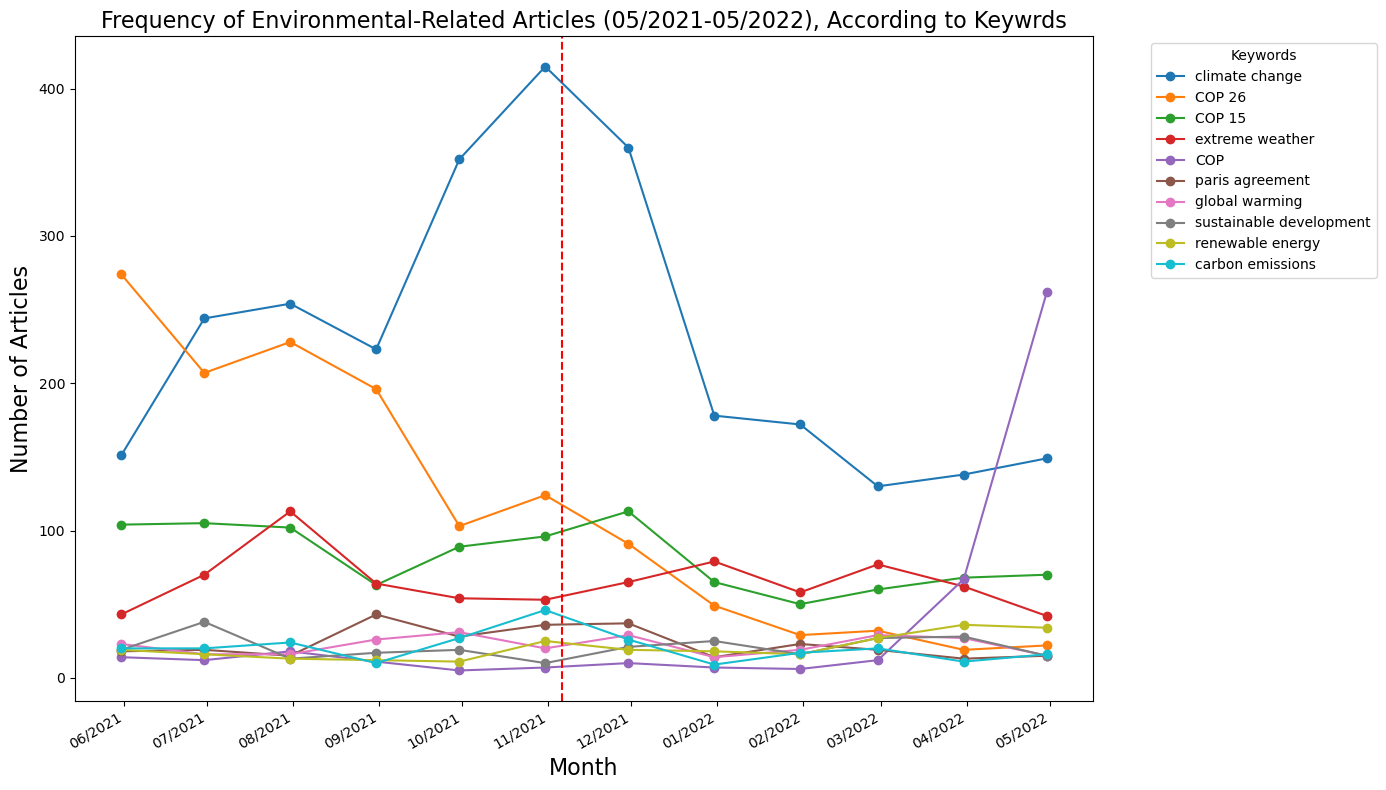

In [19]:
# draw line chart of the top 10 keywords, 2021/05 to 2022/05 
start_date = "2021-05-01"
end_date = "2022-04-30"
f_date = "2021-11-06"
draw_line_two(start_date, end_date,df_subset,f_date,"Frequency of Environmental-Related Articles (05/2021-05/2022), According to Keywrds" )

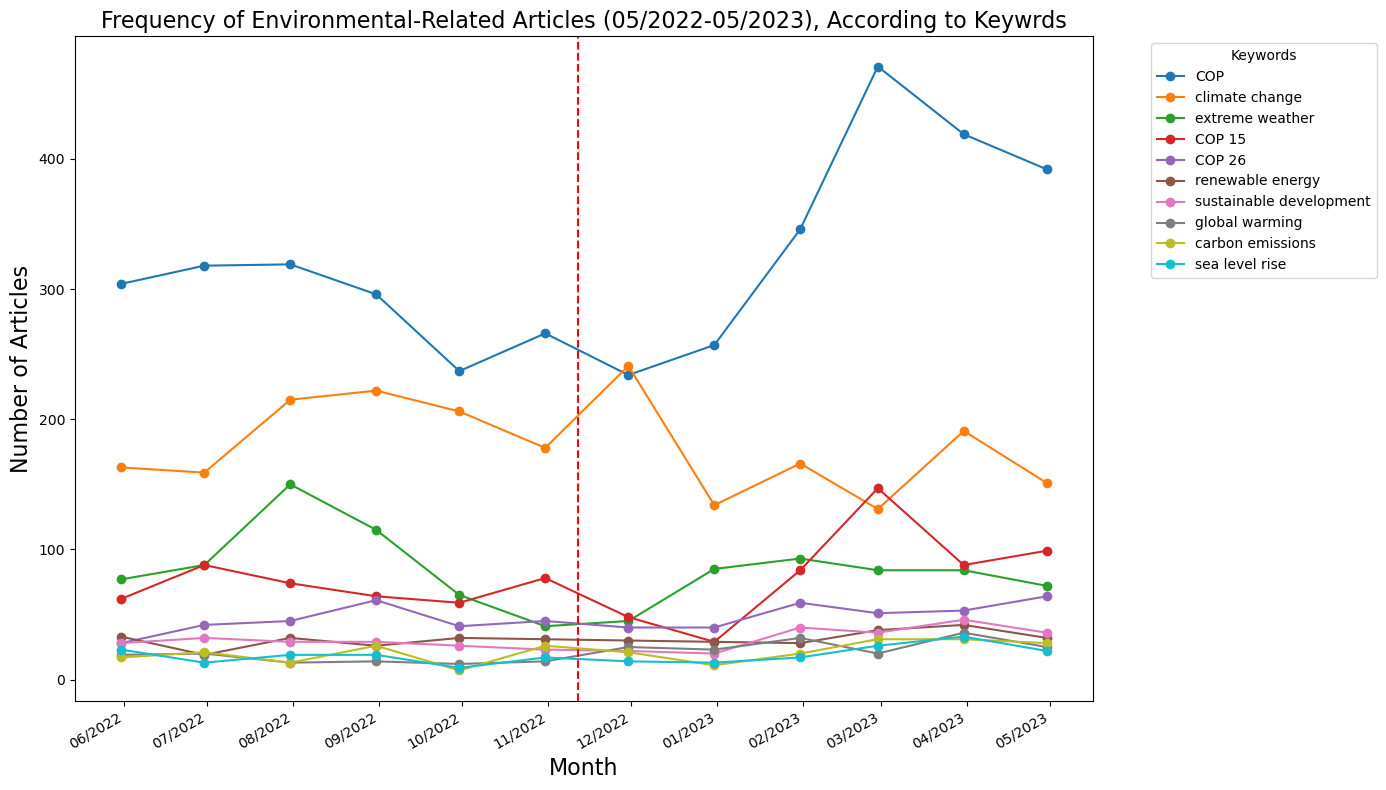

In [20]:
# draw line chart of the top 10 keywords, 2022/05 to 2023/05 
start_date = "2022-05-01"
end_date = "2023-04-30"
f_date_3 = "2022-11-12"
draw_line_two(start_date, end_date,df_subset,f_date_3,"Frequency of Environmental-Related Articles (05/2022-05/2023), According to Keywrds" )

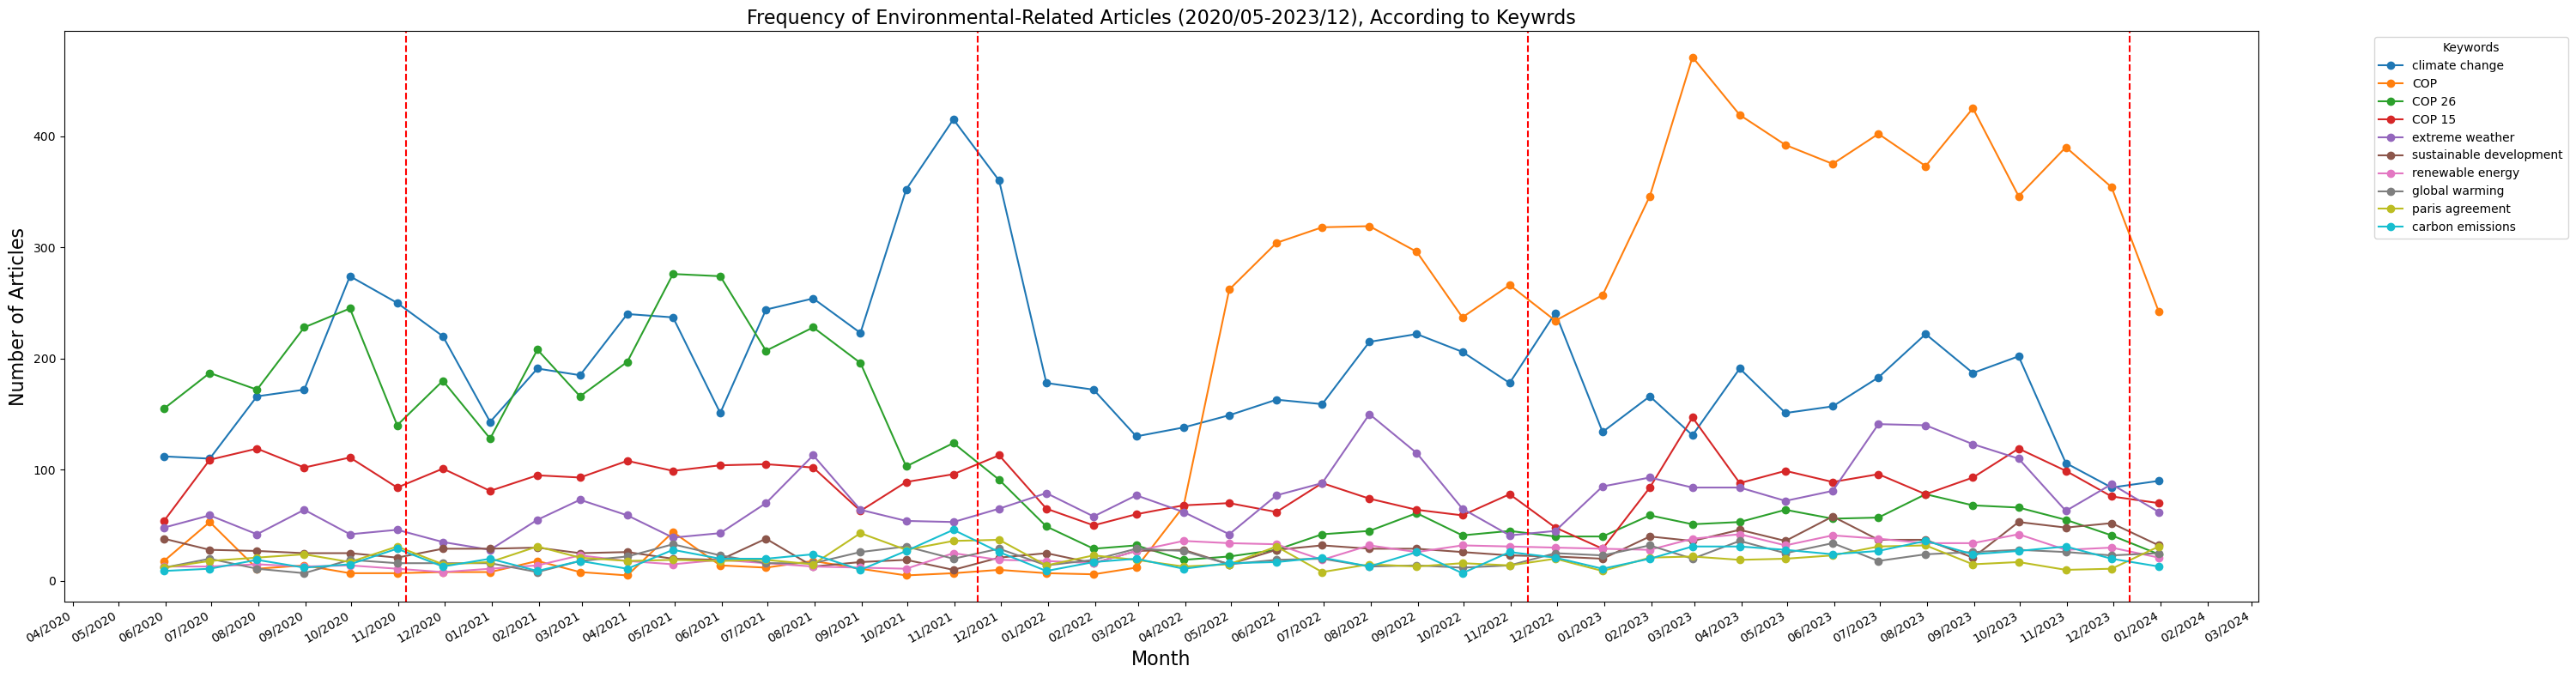

In [21]:
# draw line chart of the top 10 keywords, 2020/05 to 2023/12 
start_date = "2020-05-01"
end_date = "2023-12-30"

f_date_1 = "2020-11-06"
f_date_2 = "2021-11-16"
f_date_3 = "2022-11-12"
f_date_4 = "2023-12-12"

mask = (df_subset['date'] >= start_date) & (df_subset['date'] <= end_date)
filtered_df = df_subset.loc[mask]
    
# Now count the top ten most frequent keywords
top_keywords = filtered_df['keyword'].value_counts().head(10).index.tolist()
    
# Initialize graphics
plt.figure(figsize=(30, 8))

# For each keyword, summarize the number of articles per month and draw a line
for keyword in top_keywords:
    keyword_data = filtered_df[filtered_df['keyword'] == keyword]
    keyword_monthly_counts = keyword_data.groupby(pd.Grouper(key='date', freq='M')).size()
    plt.plot(keyword_monthly_counts.index, keyword_monthly_counts, marker='o', label=keyword)

# Specify the display format of the abscissa date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
vline_date_1 = pd.Timestamp(f_date_1)
plt.axvline(vline_date_1 , color='red', linestyle='--')

vline_date_2 = pd.Timestamp(f_date_2)
plt.axvline(vline_date_2 , color='red', linestyle='--')

vline_date_3 = pd.Timestamp(f_date_3)
plt.axvline(vline_date_3 , color='red', linestyle='--')

vline_date_4 = pd.Timestamp(f_date_4)
plt.axvline(vline_date_4, color='red', linestyle='--')

# Set title and axis labels
plt.title("Frequency of Environmental-Related Articles (2020/05-2023/12), According to Keywrds",fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of Articles',fontsize=16)

# Rotate abscissa date label
plt.gcf().autofmt_xdate()

# Add a legend and adjust the position automatically
plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show chart
plt.tight_layout()
plt.show()
